In [2]:
:dep ndarray = { version = "0.15.6"}
:dep plotters = { version = "0.3.5", default_features = false, features = ["evcxr", "all_series"] }
:dep graphviz-rust = { version = "0.9.0" }
:dep petgraph = "0.6.4"
:dep petgraph-evcxr = "*"

use ndarray::{Array, Zip};
use plotters::prelude::*;
/*
use graphviz_rust::dot_generator::*;
use graphviz_rust::dot_structures::*;
use graphviz_rust 
    exec_dot,
    cmd::Format,
    printer::{PrinterContext, DotPrinter},
};
*/

extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;
use petgraph_evcxr::{draw_graph, draw_graph_with_attr_getters, draw_dot};

In [ ]:
fn f(x: f64) -> f64 {
    3.0*x.powi(2) - 4.0*x + 5.0
}

In [ ]:
f(3.0)

In [ ]:
let xs = Array::range(-5., 5., 0.25);

In [ ]:
let ys = xs.map(|&x| f(x));

In [ ]:
ys

In [ ]:
evcxr_figure((680, 480), |root| {
    let mut chart = ChartBuilder::on(&root)
        .margin(30)
        .x_label_area_size(30)
        .y_label_area_size(30)
        .build_cartesian_2d(-5.0..5.0, 0.0..100.0)?;
    chart.configure_mesh().draw()?;
    chart.draw_series(LineSeries::new(xs.map(|&x| (x, f(x))), &BLACK))?;
    chart.configure_series_labels()
        .border_style(&BLACK).draw()?;
    root.present()?;
    Ok(())
})

In [ ]:
let h = 0.00000001;
let x = 2.0/3.0;
(f(x+h) - f(x)) / h

In [ ]:
let a = 2.0;
let b = -3.0;
let c = 10.0;
let d = a*b +c;
d

In [ ]:
let h = 0.0001;

// Inputs
let mut a = 2.0;
let mut b = -3.0;
let mut c = 10.0;

let d1 = a*b + c;
c += h;
let d2 = a*b + c;

println!("d1 {d1}");
println!("d2 {d2}");
// Normalized by h to get the slope
println!("slope {}", (d2 - d1)/h);

In [ ]:
:dep oxgrad = { version = "0.1.0", path = "../../oxgrad"}
use oxgrad::Value;

In [ ]:
let a: Value<f64> = Value::new(2.0);
let b: Value<f64> = Value::new(-3.0);
let c: Value<f64> = Value::new(10.0);
let d: Value<f64> = a*b+c;
println!("{:?}", d);

In [ ]:
let mut g = graph!(id!("id");
    node!("nod"),
    edge!(node_id!("a1") => node_id!(esc "a2"))
);

In [ ]:
let dot = g.print(&mut PrinterContext::default());
let format = Format::Svg;
let graph_svg = exec_dot(dot, vec![format.into()]).unwrap();

In [ ]:
println!("{}", dot);

In [3]:
use petgraph::Graph;

let mut deps = Graph::<&str, &str>::new();
let pg = deps.add_node("petgraph");
let fb = deps.add_node("fixedbitset");
let qc = deps.add_node("quickcheck");
let rand = deps.add_node("rand");
let libc = deps.add_node("libc");
deps.extend_with_edges(&[
    (pg, fb), (pg, qc),
    (qc, rand), (rand, libc), (qc, libc),
]);

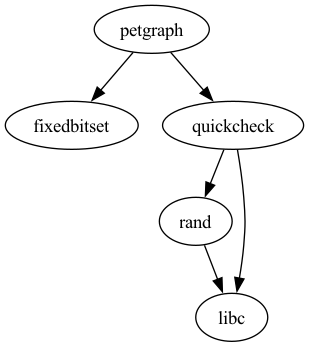

In [ ]:
draw_graph(&deps);